In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\misse\anaconda3\lib\site-packages (0.11.2)


In [51]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from numpy import unique
import seaborn as sn
import statistics as st

# Hotel Booking Data

In this project, the objective is to perform data cleaning on the hotel booking data. Data cleaning is a process to detect, correct or remove inaccurate records from the dataset, this will insure a quality data ready for analysis. These are the various steps we will follow:

1) Find dirt

2) Scrub the dirt

3) Rinse and repeat 1 and 2

## Loading data

In [52]:
pd.get_option("display.max_columns")
data = pd.read_csv("hotel_bookings.csv")
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [53]:
data.shape

(119390, 32)

The data contains 119390 rows(records or observations) and 32 number of columns(variables or features).

In [54]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


## 1) Find the dirt

We are going to determine if there is any issue(missing values, duplicates, outliers, Inconsistency...) with the data. 

**a) Missing Data**

Let's find out if the dataset contains missing values, dataset with missing values cannot being used for data modeling.

In [55]:
# First let'st check columns with missing values
print(data.isnull().any())
miss_col = data.isnull().sum()
miss_col

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Four columns contain missing values, These columns are children, country, agent, and company. Before taking any decision about what to do with these columns, let's find the percentage of missing data in these column.

In [56]:
# total missing values in the dataset
Total_missing = miss_col.sum()
print(Total_missing)

# total cells in the dataset
total_cells = np.product(data.shape)
print(total_cells)

# percentage missing data
percent = (Total_missing/total_cells)*100

print("The percentage of missing data is","%.3f%%" %(percent))

129425
3820480
The percentage of missing data is 3.388%


In [57]:
# missing value per column
for col in data.columns:
    if data[col].isnull().any()==True:
        col_percent=(data[col].isnull().sum()/data.shape[0])*100
        print(col,"has","%.3f%%" %(col_percent)," missing values")

children has 0.003%  missing values
country has 0.409%  missing values
agent has 13.686%  missing values
company has 94.307%  missing values


Company has a very high missing values percentage **94.3 percent**, followed by Agent  **13.68 percent**, followed by Country **0.4 percent** and then children **0.00335 percent**.

**b) Columns with Single Value**

Let's identify if the dataset has columns with single values, Columns thata contain single values are useless for modeling.

In [58]:
# summarize the number of unique values for each column using pandas.
counts=data.nunique()

In [62]:
counts

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [59]:
# list of columns with single values 
unique_col = [i for i,v in enumerate(counts) if v==1]
print(len(unique_col))

0


There is no column with single value, but there are columns with few values, below we will determine columns with few values 

**C) Columns that contain very Few Values**

Columns with few values are also not good for modeling, we will identify columns with few values

In [60]:
for i in range(data.shape[1]):
    values=len(unique(data.iloc[:,i].astype(str)))
    percentage=(float(values)/data.shape[0])*100
    #summarize those variables that have unique values that are less than 1 percent of the number of rows.
    if percentage<1:
        print('%d, %d, %.3f%%' % (i, values, percentage)) 

0, 2, 0.002%
1, 2, 0.002%
2, 479, 0.401%
3, 3, 0.003%
4, 12, 0.010%
5, 53, 0.044%
6, 31, 0.026%
7, 17, 0.014%
8, 35, 0.029%
9, 14, 0.012%
10, 6, 0.005%
11, 5, 0.004%
12, 5, 0.004%
13, 178, 0.149%
14, 8, 0.007%
15, 5, 0.004%
16, 2, 0.002%
17, 15, 0.013%
18, 73, 0.061%
19, 10, 0.008%
20, 12, 0.010%
21, 21, 0.018%
22, 3, 0.003%
23, 334, 0.280%
24, 353, 0.296%
25, 128, 0.107%
26, 4, 0.003%
28, 5, 0.004%
29, 6, 0.005%
30, 3, 0.003%
31, 926, 0.776%


31 columns out of 32 have unique values that are less than 1% of the number of rows. This does not mean that these rows and columns should be deleted, but they require further attention. For example:

* Perhaps the unique values can be encoded as ordinal values?
* Perhaps the unique values can be encoded as categorical values?


**D) Duplicate Data**

Let's look for duplicates in our dataset, it is important to identify and remove duplicates from dataset because they biased the fitted model and lead to ovefitting

In [12]:
dupl = data.duplicated()
#report if there is any duplicate
print(dupl.any())
print("There are",dupl.sum(),"duplicated rows")

True
There are 31994 duplicated rows


**E) Invalid and Contaminated Data**

Invalid and contaminated data are illogical data due to human errors or results of functions giving illogical outcome. For example having 500 for age or -12 for weight. To find out if there is any invalid or contaminated data, we will plot histograms of all the columns.

**Numerical Data**

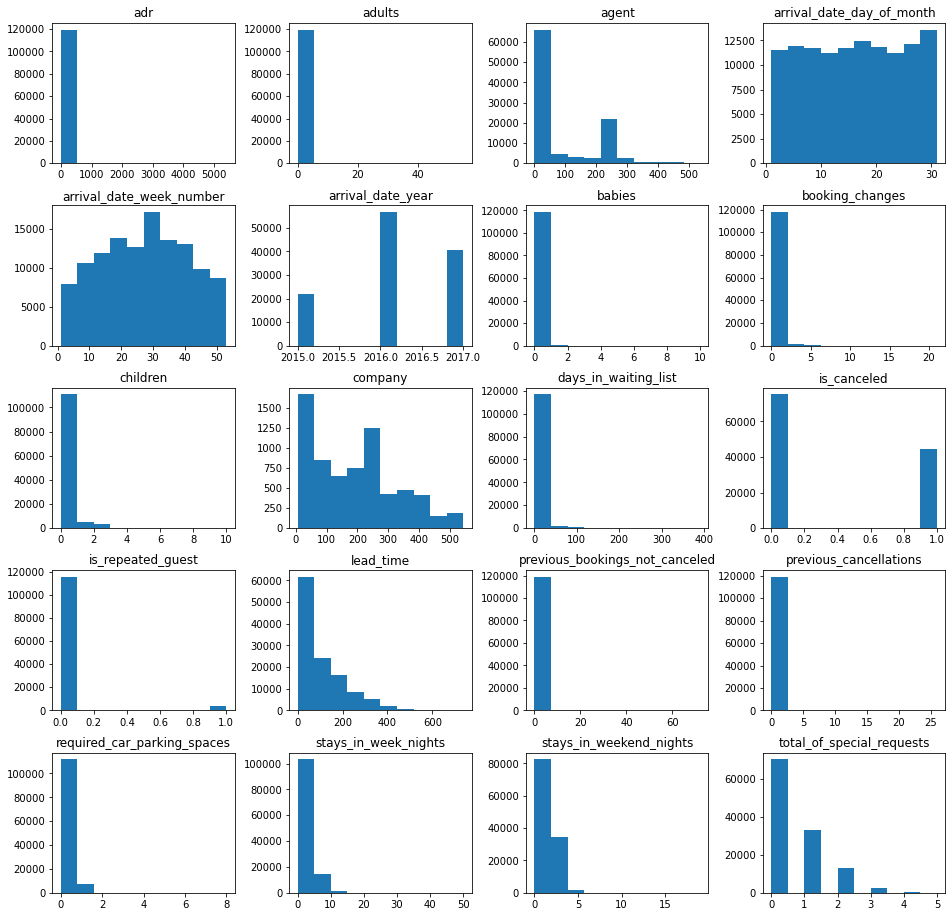

In [13]:
#Numerical columns
numerical_cols=[cname for cname in data.columns if data[cname].dtype in ["int64","float64"]]
histograms = data[numerical_cols].hist(figsize=(16,16), grid=False)

From the histograms, we can conclude there is no illogical value for each numerical columns.

**Categorical Data**

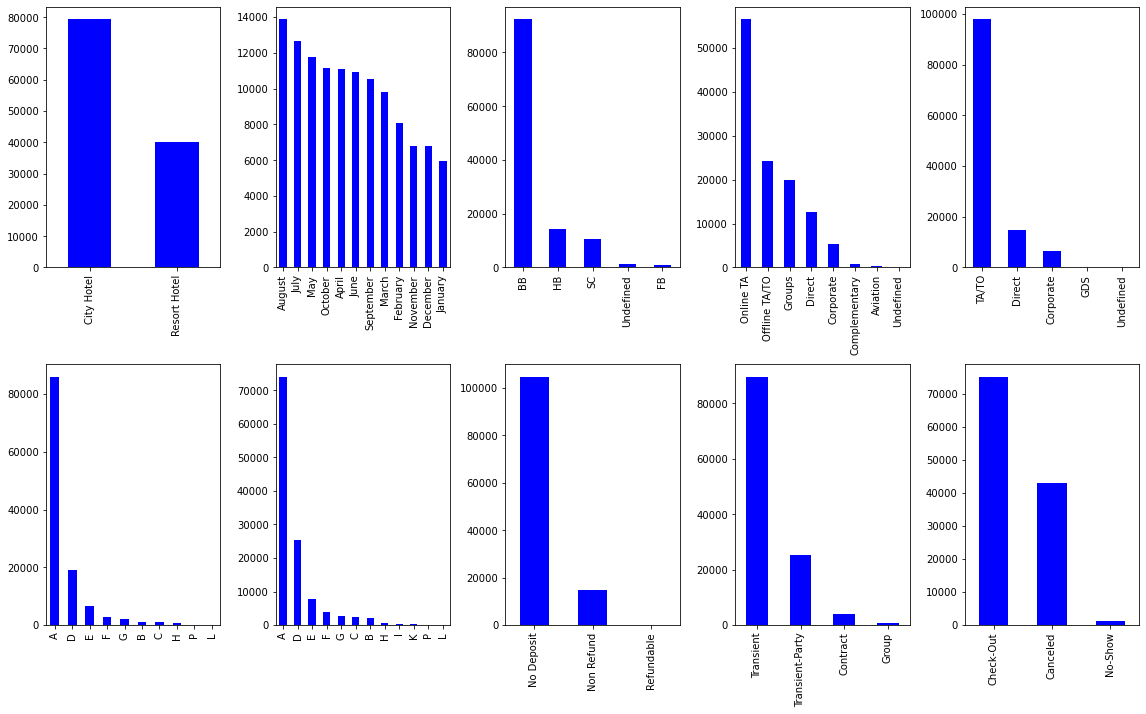

In [14]:
#categorical columns
catego_cols=[cname for cname in data.columns if (data[cname].dtype=="object")]
cat=[c for c in catego_cols if c not in ["country","reservation_status_date"]]
fig, axes = plt.subplots(2,5 , figsize=(16,10))
axes_it = axes.flat
for c,ax in zip(cat, axes_it):
    #data[c].value_counts().plot(kind='bar')
    data[c].value_counts().plot(kind="bar", ax=ax, color="blue")
fig.tight_layout(pad=1.0)
plt.show()


From the bar charts, we can conclude there is no illogical value for each categorical columns.

**F) Inconsistence Data**

They are same elements with different cases , different datatypes or misspelling, From the above plots, we can conclude that the categorical columns don't contain inconsistent data. We did not plot country column, let's display all the unique values after removing blank spaces and converting everything into lower case, and see if it contains any inconsistency.  

In [15]:
# convert to lower case
data['country'] = data['country'].str.lower()
# remove trailing white spaces
data['country'] = data['country'].str.strip()

In [16]:
# get all the unique values in the 'Country' column
countries=data["country"].astype(str).unique()
# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['abw', 'ago', 'aia', 'alb', 'and', 'are', 'arg', 'arm', 'asm',
       'ata', 'atf', 'aus', 'aut', 'aze', 'bdi', 'bel', 'ben', 'bfa',
       'bgd', 'bgr', 'bhr', 'bhs', 'bih', 'blr', 'bol', 'bra', 'brb',
       'bwa', 'caf', 'che', 'chl', 'chn', 'civ', 'cmr', 'cn', 'col',
       'com', 'cpv', 'cri', 'cub', 'cym', 'cyp', 'cze', 'deu', 'dji',
       'dma', 'dnk', 'dom', 'dza', 'ecu', 'egy', 'esp', 'est', 'eth',
       'fin', 'fji', 'fra', 'fro', 'gab', 'gbr', 'geo', 'ggy', 'gha',
       'gib', 'glp', 'gnb', 'grc', 'gtm', 'guy', 'hkg', 'hnd', 'hrv',
       'hun', 'idn', 'imn', 'ind', 'irl', 'irn', 'irq', 'isl', 'isr',
       'ita', 'jam', 'jey', 'jor', 'jpn', 'kaz', 'ken', 'khm', 'kir',
       'kna', 'kor', 'kwt', 'lao', 'lbn', 'lby', 'lca', 'lie', 'lka',
       'ltu', 'lux', 'lva', 'mac', 'mar', 'mco', 'mdg', 'mdv', 'mex',
       'mkd', 'mli', 'mlt', 'mmr', 'mne', 'moz', 'mrt', 'mus', 'mwi',
       'mys', 'myt', 'nam', 'nan', 'ncl', 'nga', 'nic', 'nld', 'nor',
       'npl', 'nzl', 

After displaying the unique values, we can conclude country column does not contain any inconsistency data.

**G) Outliers**

They are extremes values in the dataset, they could be due to processing errors or interesting behaviors. Having outliers can mess up the analysis by bringing the averages up or down and in general distorting the statistics.

In [17]:
k=[]
for c in numerical_cols:
    q25, q75 = np.percentile(data[c], 25), np.percentile(data[c], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # identify outliers
    indx = np.where((data[c] < lower) | (data[c] > upper))
    print(c,'----------> Identified outliers: %d' % len(indx[0]))

    if len(indx[0])>0:
       k.append(c)
print("**************************************")
print("**************************************")
print(len(k),"numerical columns have outliers")

Percentiles: 25th = 0.000, 75th = 1.000, IQR = 1.000
is_canceled ----------> Identified outliers: 0
Percentiles: 25th = 18.000, 75th = 160.000, IQR = 142.000
lead_time ----------> Identified outliers: 3005
Percentiles: 25th = 2016.000, 75th = 2017.000, IQR = 1.000
arrival_date_year ----------> Identified outliers: 0
Percentiles: 25th = 16.000, 75th = 38.000, IQR = 22.000
arrival_date_week_number ----------> Identified outliers: 0
Percentiles: 25th = 8.000, 75th = 23.000, IQR = 15.000
arrival_date_day_of_month ----------> Identified outliers: 0
Percentiles: 25th = 0.000, 75th = 2.000, IQR = 2.000
stays_in_weekend_nights ----------> Identified outliers: 265
Percentiles: 25th = 1.000, 75th = 3.000, IQR = 2.000
stays_in_week_nights ----------> Identified outliers: 3354
Percentiles: 25th = 2.000, 75th = 2.000, IQR = 0.000
adults ----------> Identified outliers: 29710
Percentiles: 25th = nan, 75th = nan, IQR = nan
children ----------> Identified outliers: 0
Percentiles: 25th = 0.000, 75th = 

In [18]:
# Columns with outliers
k

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

Out of the 20 numerical columns 13 contain outliers. We will decide what to do about them later, let's pick the column lead_time and interprete the result.



{'whiskers': [<matplotlib.lines.Line2D at 0x14b68ba3af0>,
 'caps': [<matplotlib.lines.Line2D at 0x14b6cff5370>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b68ba38b0>],
 'medians': [<matplotlib.lines.Line2D at 0x14b6cff5a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x14b6cff5d00>],
 'means': []}

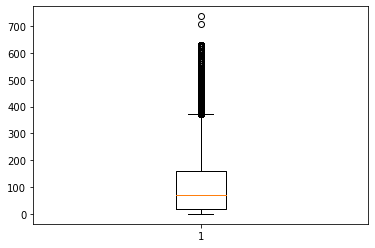

In [19]:
plt.boxplot(data["lead_time"])

From the box plot and the percentiles calculation done above **(Percentiles: 25th = 18.000, 75th = 160.000, IQR = 142.000)**, we can see the minimum lead-time is 0, the median lead time is approximatively 70 days, the maximum lead time excluding outliers is approximatively 380 days, 25 percent of the lead time is below 18 days and 75 percent of the lead time is below 160 days. The IQR being days minutes which is a large value, we can conclude that the the middle 50 percent of our data is widely spread. The number of outliers identified for lead time is **3005**.

## 2) Scrub the dirt

After finding the dirt, we have now to clean dirts found in the dataset

**a) Remove outliers from the dataset**

Firstly, we will start by removing rows with outliers from the dataset. from the dataset, from the outliers analysis done above, 13 columns have outliers.

In [20]:
data.drop(data.iloc[indx].index, inplace=True)
print('Non-outlier observations: %d' % len(data))
data.shape

Non-outlier observations: 116513


(116513, 32)

After removing the outliers the dataset contains now , 116513 rows and 32 columns

**b) Clean Missing Data**

Let's remove columns with missing data from the dataset. From  the missing data analysis done above, four columns contain missing data: Company (94.3%), Agent (13.68%), Country (0.4%) and children (0.00335%). The two first columns contain a high level of missing data, so the best thing to do is to remove them, for children we will use statistical imputation. It will be left with country, dropping it is not a good solution it has only 0.5 percent of missing data, and imputing it is not advisable, so we will drop the null values.

In [21]:
# dropping company and agent columns
data.drop(['company','agent'],axis='columns', inplace=True)
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
data.shape

(116513, 30)

In [23]:
# Imputing children column using mode(most frequently occuring value in the column)
data["children"].fillna(st.mode(data["children"]), inplace=True)
data["children"].isnull().sum()

0

In [24]:
# dropping remaining NAs from the dataset
data.dropna(inplace=True)
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [25]:
data.shape

(116038, 30)

We have solved the missing data issues, the data does not contain any missing data anymore, and the data shape has changed. Before it has 116513 rows and 32 columns but now it has 116038 rows and 30 columns.

**c) Clean Duplicate Data**

After solving missing values issue, let's remove duplicates from the dataset, from the duplicates analysis done above, the dataset contains 31984 duplicated rows.

In [26]:
data.drop_duplicates(inplace=True)
print(data.shape)

(84258, 30)


The duplicate issue is also resolved, and the shape of the dataset has changed again. The dataset now has 84258 rows and 30 columns.

**d) Irrelevants Columns and Data Type**

Let's check if each column has the appropriate data type, and also columns that are irrelevants. 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84258 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84258 non-null  object 
 1   is_canceled                     84258 non-null  int64  
 2   lead_time                       84258 non-null  int64  
 3   arrival_date_year               84258 non-null  int64  
 4   arrival_date_month              84258 non-null  object 
 5   arrival_date_week_number        84258 non-null  int64  
 6   arrival_date_day_of_month       84258 non-null  int64  
 7   stays_in_weekend_nights         84258 non-null  int64  
 8   stays_in_week_nights            84258 non-null  int64  
 9   adults                          84258 non-null  int64  
 10  children                        84258 non-null  float64
 11  babies                          84258 non-null  int64  
 12  meal                           

Starting with the irrelevant columns, arrival_date_week_number does not seem wo relevant since we have arrival_date_year, arrival_date_month, arrival_date_day_of_month columns we can use as date. So let's delete it.

In [28]:
data.drop('arrival_date_week_number',axis='columns', inplace=True)
data.shape

(84258, 29)

 Now concerning the colomns datatypes, they are correct but lets combine arrival_date_year, arrival_date_month, arrival_date_day_of_month columns as one and make it date.

In [29]:
# creating the new column
data["arrival_date"] = data["arrival_date_day_of_month"].astype(str)+' '+data["arrival_date_month"]+' '+data["arrival_date_year"].astype(str)
data.shape

(84258, 30)

In [30]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [31]:
#Let's delete the three columns and convert the new one to date.
#data.drop(['arrival_date_day_of_month','arrival_date_month','arrival_date_year'],axis='columns', inplace=True)
data["arrival_date"] = pd.to_datetime(data["arrival_date"])
data=data[['hotel', 'is_canceled','lead_time', 'arrival_date',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']]
#Change the new column position
print(data.shape)
data.head(5)

(84258, 27)


,hotel,is_canceled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,0,0,2,0.0,0,BB,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,0,0,2,0.0,0,BB,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,0,1,1,0.0,0,BB,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,0,1,1,0.0,0,BB,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,0,2,2,0.0,0,BB,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
day = data["arrival_date"].dt.day
month = data["arrival_date"].dt.month
year = data["arrival_date"].dt.year

Let's plot the distribution of days, month and years to make sure the parsing dates worked. 

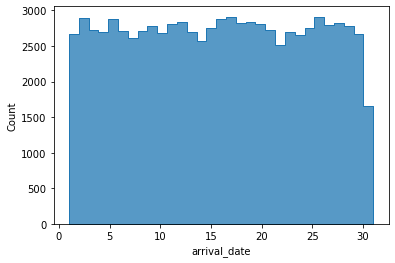

In [33]:
#days distribution
sn.histplot(day, kde=False, bins=31, element="step")

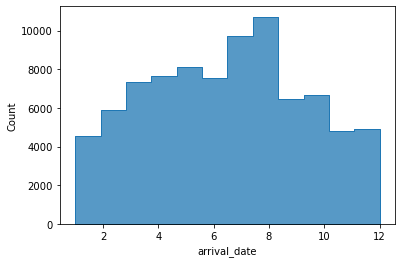

In [34]:
sn.histplot(month, kde=False, bins=12, element="step")

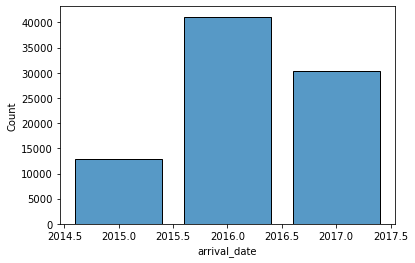

In [35]:
sn.histplot(year, kde=False, bins=[2015,2016,2017], shrink=0.8, discrete=True, binwidth=1)

From the above graphs, we can tell the parsing date worked well. We have completed the the second step which is scrubing the dirt. Let's move to the third step which is checking if the data is well cleaned. 

## 3) Rinse and Repeat 1 and 2

**Checking Missing data, duplicate, unique data**

In [36]:
data.isnull().all()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date                      False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False
adr                               False
required_car_parking_spaces       False
total_of_special_requests         False


In [37]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          477
arrival_date                       793
stays_in_weekend_nights             15
stays_in_week_nights                32
adults                              14
children                             5
babies                               5
meal                                 5
country                            176
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     20
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                               8673
required_car_parking_spaces          5
total_of_special_requests            3
reservation_status       

In [38]:
data.duplicated().all()

False

The data does not contain dirt anymore, let's save it !!!

In [39]:
data.to_csv('final_data.csv')

## 4) Conclusion

In this mini project, we have performed data cleaning, by first detcting the dirt, cleaning them and checking it back. The data is now ready for any further analysis.